In [1]:
!pip install statannotations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 25.9 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 1.5.3 which is incompatible.


In [2]:
!pip install statsmodels

In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statannotations.Annotator import Annotator
from statsmodels.stats.multitest import multipletests
import unittest
import warnings
from functools import partial
#annotator.reset_configuration()
import numpy.testing as npt
from statsmodels.stats.multitest import multipletests

from statannotations.stats.ComparisonsCorrection import \
    ComparisonsCorrection, get_validated_comparisons_correction

In [4]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [5]:
%cd
%cd /content/drive/MyDrive/scVAG/Statics/scVAG_Test/
!ls

/root
/content/drive/MyDrive/scVAG/Statics/scVAG_Test
Chung.zip				    Robustness_analysis.ipynb	   T_test_results
Interpretability_Chung.ipynb		    scVAG_P_Value_Evaluation.xlsx  t-test-text.docx
Interpretability_Human_TBNK_Antibody.ipynb  scVAG_P_Value.gsheet
P_values_calculation_notebook.ipynb	    t_test.ipynb


In [8]:
# Replace 'file.xlsx' with the path to your Excel file
xlsx_file = 'scVAG_P_Value_Evaluation.xlsx'

# Read the Excel file
xls = pd.ExcelFile(xlsx_file)

# Create an empty dictionary to store dataframes
dfs = {}

# Iterate through each sheet in the Excel file
for sheet_name in xls.sheet_names:
    # Read each sheet into a dataframe
    df = pd.read_excel(xls, sheet_name)
    # Store the dataframe in the dictionary with the sheet name as the key
    dfs[sheet_name] = df

# Now, dfs is a dictionary where keys are sheet names and values are dataframes
# You can access each dataframe using its corresponding sheet name
# For example, to access the dataframe of the first sheet:
first_sheet_df = dfs[xls.sheet_names[0]]

In [14]:
%cd T_test_results/
!ls

/content/drive/MyDrive/scVAG/Statics/scVAG_Test/T_test_results


In [9]:
dfs.keys()

dict_keys(['Average', 'Klein', 'Romanov', 'Chung', 'PBMC', 'Björklund', 'Petropolus', 'Brain_Mouse', 'Neuron', 'Biase', 'Adult_Mouse_Heart_5k', 'Human_TBNK_Antibody'])

In [81]:
klein = dfs['Human_TBNK_Antibody']
df = klein.loc[:, ['Method', 'NMI']]
df.head()

,Method,NMI
0,scVAG,0.755
1,scVAG,0.759
2,scVAG,0.769
3,scVAG,0.756
4,scVAG,0.756


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

scVAG vs. SCEA: t-test independent samples, P_val:8.851e-07 t=1.347e+01
scVAG vs. SC3: t-test independent samples, P_val:2.681e-10 t=3.772e+01
scVAG vs. scGAG: t-test independent samples, P_val:2.736e-05 t=8.533e+00
scVAG vs. scGNN: t-test independent samples, P_val:3.361e-13 t=8.712e+01
scVAG vs. Seurat: t-test independent samples, P_val:3.155e-03 t=-4.162e+00
scVAG vs. DESC: t-test independent samples, P_val:8.786e-10 t=3.249e+01
scVAG vs. scASGC: t-test independent samples, P_val:9.874e-10 t=3.201e+01


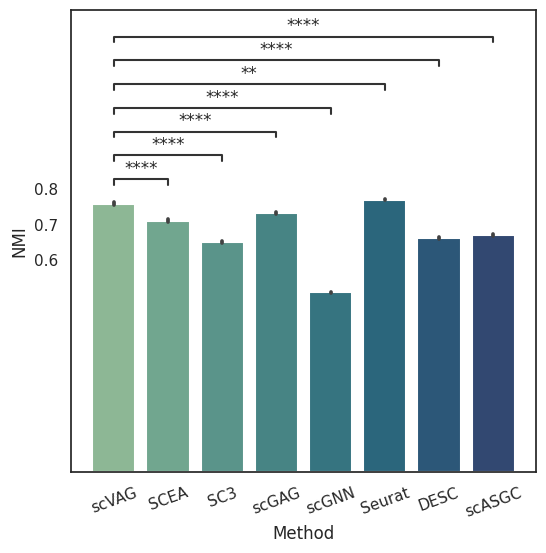

In [82]:
sns.set(style="white")
fig, ax = plt.subplots(figsize=(7.5, 8))
x = "Method"
y = "NMI"

order = [ 'scVAG','SCEA','SC3','scGAG', 'scGNN','Seurat','DESC','scASGC']


ax = sns.barplot(data=df, x=x, y=y, order=order,linewidth=1.5,palette="crest",)

pairs=[("scVAG", "SCEA"),("scVAG", "SC3"),("scVAG", "scGAG"),("scVAG", "scGNN"),("scVAG", "Seurat"),("scVAG", "DESC"),("scVAG", "scASGC")]


annotator = Annotator(ax, pairs, data=df, x=x, y=y, order=order)
annotator.configure(test='t-test_ind', text_format='star', loc='inside',comparisons_correction=None,correction_format='default')

annotator.apply_and_annotate()
fig.set_size_inches(6,6)


plt.xticks(rotation=20, ha='center')

plt.yticks(np.arange(0.60, 0.80, 0.1))

plt.savefig("Human_TBNK_Antibody_NMI.tiff",bbox_inches='tight', pad_inches=0.5, dpi=300,pil_kwargs={"compression": "tiff_lzw"})


plt.show()